**Варіант №1**

**Завдання 1.** Побудова регресійної моделі та запобігання перенавчанню.

Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у
бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних
моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних
технік.

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
wine_data = load_wine()

X = wine_data.data
y = wine_data.target
df = pd.DataFrame(X, columns=wine_data.feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#Побудова регресійної моделі

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 0.06, R^2 = 0.90
Тестові дані: MSE = 0.06, R^2 = 0.90


In [5]:
# 2. Запобігання перенавчанню з використанням регуляризації
alphas = np.logspace(0, 4, 100)  # Діапазон значень для параметра регуляризації

# Ridge Regression
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

In [6]:
# Лассо Regression
lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

# Вибір кращих моделей за допомогою перехресної валідації
best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")

Найкраще значення alpha для Ridge: 7.054802310718643
Найкраще значення alpha для Lasso: 1.0


In [7]:
# Переоцінка моделей на тестових даних

ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

# Оцінка моделей з регуляризацією

ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge Regression: MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge Regression: MSE = 0.06, R^2 = 0.90
Lasso Regression: MSE = 0.33, R^2 = 0.45


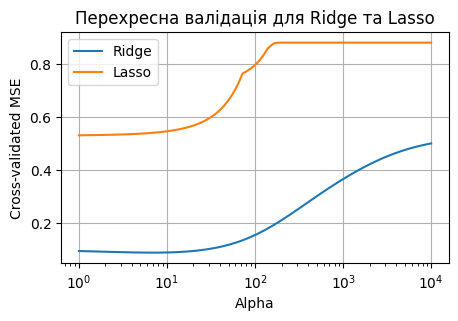

In [10]:
# Візуалізація результатів

plt.figure(figsize=(5, 3))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

**ВИСНОВОК**

Було обрано один із датасетів бібліотеки scikit-learn "Wine". На основі навчальнох вибірки побудовано базову лінійну регресійну модель та була оцінена її точність. Також виконано аналіз перенавчання. Лінійна та Ridge регресії є кращим вибором. Також побудрвано графік, який демонструє залежність помилки моделі від
гіперпараметрів регуляризації.

**Завдання 2.** Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

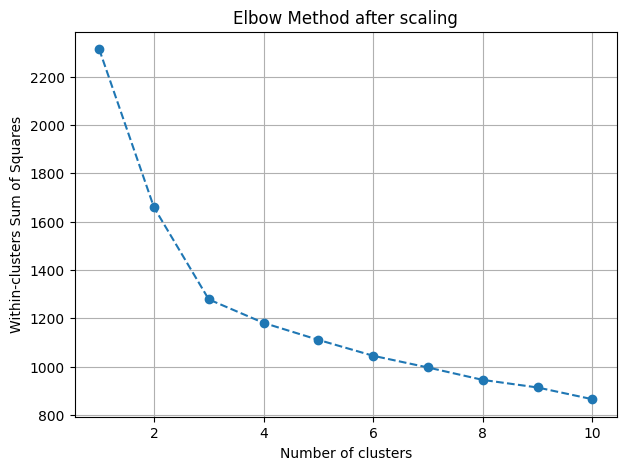

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_2d = pd.DataFrame(X_scaled, columns=wine_data.feature_names)

wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method after scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Within-clusters Sum of Squares')
plt.grid(True)
plt.show()

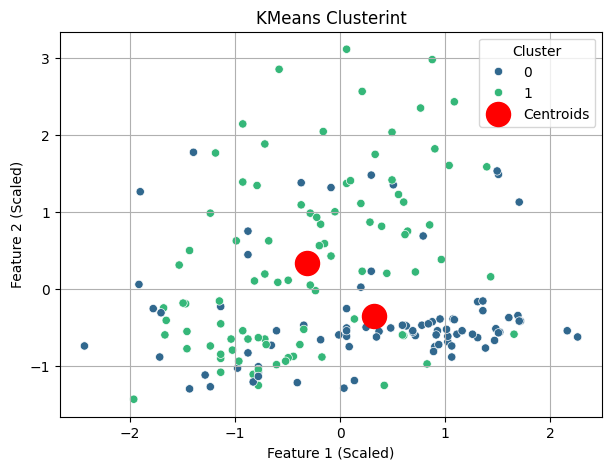

In [21]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('KMeans Clusterint')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**ВИСНОВОК **

Виконали кластерізацію даних. Затосували метод ліктя або метод силуєтів.
У підсумку у нас вийшла графічна візуалізація яка показує наш аналіз.